In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.8.0'

In [3]:
import keras

Using TensorFlow backend.


In [4]:
keras.__version__

'2.1.6'

In [5]:
# Step 1. 匯入 Kearas 程式，下載並讀取 mnist 資料
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

In [6]:
# Step 2. 匯入 Keras 模組
from keras.datasets import mnist

In [7]:
# Step 3. 第一次執行下載 mnist 資料
(X_train_image,y_train_label),\
(X_test_image,y_test_label) = mnist.load_data()

In [8]:
# Step 4. 查看下載的 mnist 資料檔案
# C:\Users\Asus\.keras\datasets

In [9]:
# Step 5. 讀取 mnist 資料
(X_train_image,y_train_label),\
(X_test_image,y_test_label) = mnist.load_data()

In [10]:
# Step 6. 查看 mnist 資料
print('train data=',len(X_train_image))
print(' test data=',len(X_test_image))

train data= 60000
 test data= 10000


In [11]:
# 查看訓練資料
# Step 1. 訓練資料是由 images 與 labels 所組成
print('X_train_image:',X_train_image.shape)
print('y_train_label:',y_train_label.shape)

X_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [12]:
# Step 2. 定義 plot_image 函數顯示數字影像
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()

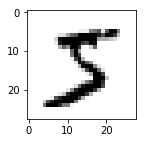

In [13]:
# Step 3. 執行 plot_image 函數查看第 0 筆數字影像
plot_image(X_train_image[0])

In [14]:
# Step 4. 查看第 0 筆 labels 資料
y_train_label[0]

5

In [15]:
# 查看多筆訓練資料 images 與 label
# Step 1. 建立 plot_image_labels_prediction函數，可以顯示多筆 mnist 資料的 images 與 label
# 因為後續我們希望能很方便查看數字圖形、真實的數字與預測結果，所以我們建立了下列函數
import matplotlib.pyplot as plt
def plot_image_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)                  # 建立 subgraph 子圖形為5行5列
        ax.imshow(images[idx], cmap='binary')    
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+= "label=" +str(labels[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()


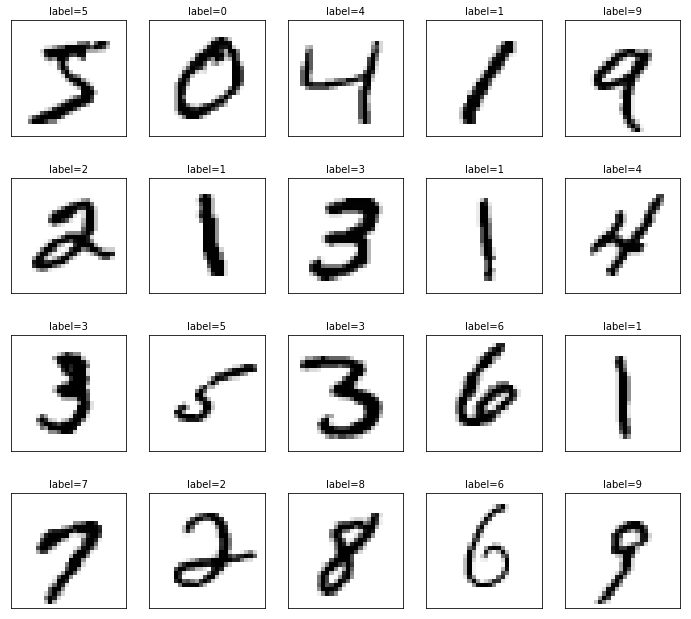

In [16]:
# Step 2. 查看訓練資料前 10 筆資料
plot_image_labels_prediction(X_train_image,y_train_label,[],0,20)

In [17]:
# Step 3. 查看 test 測試資料
print('X_test_image:',X_test_image.shape)
print('y_test_label:',y_test_label.shape)

X_test_image: (10000, 28, 28)
y_test_label: (10000,)


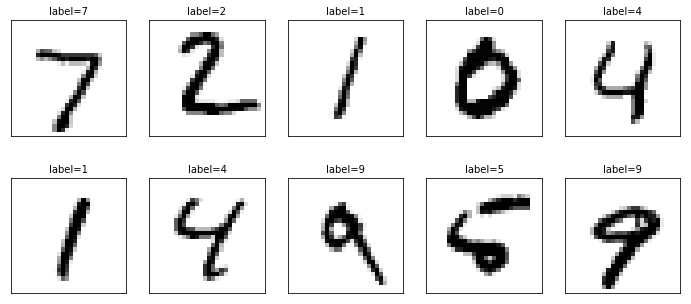

In [18]:
# Step 4. 執行 show_image_labels() 顯示測試資料前 10 筆資料
plot_image_labels_prediction(X_test_image,y_test_label,[],0,10)

In [19]:
# 多層感知器模型資料預處理
# feature (數字影像的特徵值) 資料預處理
# 1.將原本28x28數字影像，以reshape轉換成1維的向量，其長度是784，並轉換為float
# 2.數字影像image的數字標準化
# Step 1. 查看資料的 shape
print('X_train_image:',X_train_image.shape)
print('y_train_label:',y_train_label.shape)

X_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [20]:
X_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [21]:
# Step 2. 將 image 以 reshape 轉換
# 將原本28x28的2維數字影像，以reshape轉換為1維的向量，再以astype轉換為float，共784個float數字
x_Train = X_train_image.reshape(60000, 784).astype('float32')
x_Test = X_test_image.reshape(10000, 784).astype('float32')

In [22]:
# Step 3. 查看轉換為1維的向量的shape
print('x_train:',x_Train.shape)
print('x_Test:',x_Test.shape)

x_train: (60000, 784)
x_Test: (10000, 784)


In [23]:
# Step 4. 查看image影像的內容 (0->256;0->FF)
X_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [24]:
# Step 5. 將數字影像image的數字標準化
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [25]:
# Step 6. 查看數字影像image的數字標準化後的結果
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [26]:
# Labels (數字影像真實的值) 資料預處理
# 查看原本的label標籤欄位
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [27]:
# Step 2. Label標籤欄位執行 One-hot encoding 轉換 (真實為1、其餘為0)
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [28]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [29]:
# 匯入所需要的模組
from keras.models import Sequential
from keras.layers import Dense

In [30]:
# Step 3. 建立模型
model = Sequential()

In [31]:
# Step 4. 建立｢輸入層｣、「隱藏層」、「輸出層」
model.add(Dense(units=256,                   # 定義隱藏層神經元個數256
                input_dim=784,               # 設定輸入層的神經元個數784(784個float數字)
                kernel_initializer='normal', # 使用常態分配分布的亂數，初始化 weight 、 bias
                activation='relu'))          # 定義激活函數為 relu
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [32]:
# Step 5.查看模型的摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
# 進行訓練
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
# 開始訓練
train_history = model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4413 - acc: 0.8818 - val_loss: 0.2188 - val_acc: 0.9403
Epoch 2/10
 - 2s - loss: 0.1914 - acc: 0.9454 - val_loss: 0.1562 - val_acc: 0.9558
Epoch 3/10
 - 2s - loss: 0.1360 - acc: 0.9615 - val_loss: 0.1267 - val_acc: 0.9638
Epoch 4/10
 - 2s - loss: 0.1034 - acc: 0.9704 - val_loss: 0.1132 - val_acc: 0.9675
Epoch 5/10
 - 2s - loss: 0.0817 - acc: 0.9774 - val_loss: 0.0987 - val_acc: 0.9709
Epoch 6/10
 - 2s - loss: 0.0665 - acc: 0.9814 - val_loss: 0.0947 - val_acc: 0.9717
Epoch 7/10
 - 2s - loss: 0.0550 - acc: 0.9849 - val_loss: 0.0920 - val_acc: 0.9730
Epoch 8/10
 - 2s - loss: 0.0462 - acc: 0.9874 - val_loss: 0.0835 - val_acc: 0.9760
Epoch 9/10
 - 2s - loss: 0.0383 - acc: 0.9900 - val_loss: 0.0829 - val_acc: 0.9760
Epoch 10/10
 - 2s - loss: 0.0320 - acc: 0.9914 - val_loss: 0.0808 - val_acc: 0.9759


In [35]:
# 建立show_train_history 顯示訓練過程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

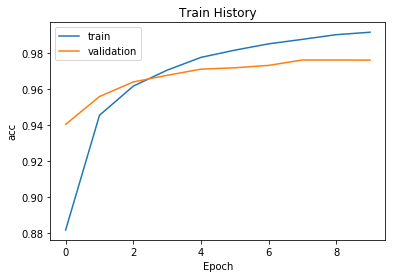

In [36]:
show_train_history(train_history,'acc','val_acc')

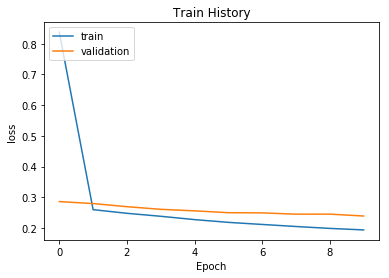

In [85]:
show_train_history(train_history,'loss','val_loss')

In [86]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 56us/step

accuracy= 0.9425


In [44]:
# 執行預測
prediction = model.predict_classes(x_Test)

In [45]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

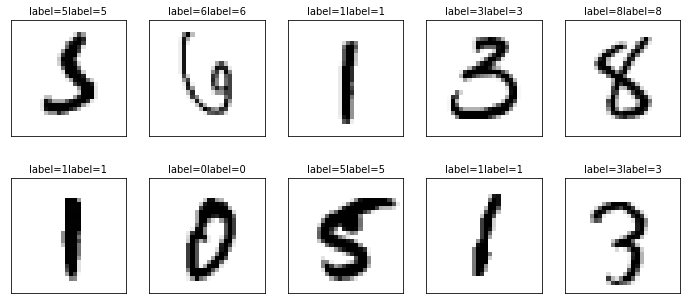

In [46]:
# 顯示10筆預測結果
plot_image_labels_prediction(X_test_image,y_test_label,prediction,idx=340)

In [47]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1011,2,1,0,2,3,8,0
3,0,0,2,995,0,1,0,3,5,4
4,2,0,5,1,961,0,2,0,3,8
5,3,0,0,16,1,852,6,1,10,3
6,5,3,2,1,4,3,937,0,3,0
7,0,5,12,7,1,0,0,988,6,9
8,4,0,3,7,0,1,1,2,955,1


In [48]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [49]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


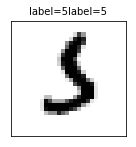

In [50]:
plot_image_labels_prediction(X_test_image,y_test_label,prediction,idx=340,num=1)